# [미션] 202202_age.csv 파일에서 제주도 인구현황을 분석하시오

#### 1. 데이터에서 제주도 지역 데이터 추출하기
- 제주도 '행정기관' 내용을 이용해 '읍면동' 필드 생성   
  읍면동이 없는 데이터는 상위 구분(제주특별자치도/서귀포시)으로 입력
- 제주시와 서귀포시의 인구 현황 분석(어디가 더 많이 거주하는지 확인)-그래프로도 표현
- 제주시의 지역(읍면동 단위) 인구현황을 계산하고 막대 차트로 출력하시오

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 3s (3,352 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 155335 files and d

In [11]:
# 파일 읽어오기

#from google.colab import files

#files.upload()
import pandas as pd

jage_df = pd.read_csv("202202_age.csv", encoding="cp949", header=3, thousands=",")
display(jage_df.tail())
print(jage_df.info())

,행정기관코드,행정기관,총 거주자수,연령구간인구수,0세,1세,2세,3세,4세,5세,...,91세.2,92세.2,93세.2,94세.2,95세.2,96세.2,97세.2,98세.2,99세.2,100세 이상.2
3861,5013058000,제주특별자치도 서귀포시 서홍동,11156,11156,79,72,89,98,117,143,...,5,3,8,1,1,2,0,0,2,4
3862,5013059000,제주특별자치도 서귀포시 대륜동,15304,15304,105,125,168,140,154,182,...,14,8,7,7,3,4,0,4,4,5
3863,5013060000,제주특별자치도 서귀포시 대천동,13773,13773,84,104,135,117,182,202,...,13,8,8,7,4,2,1,1,1,3
3864,5013061000,제주특별자치도 서귀포시 중문동,11955,11955,65,71,89,82,72,89,...,12,9,7,5,2,4,1,2,0,4
3865,5013062000,제주특별자치도 서귀포시 예래동,3890,3890,15,14,10,23,22,20,...,7,7,2,5,2,1,0,4,1,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3866 entries, 0 to 3865
Columns: 311 entries, 행정기관코드 to 100세 이상.2
dtypes: int64(310), object(1)
memory usage: 9.2+ MB
None


In [ ]:
# 제주도 '행정기관' 내용을 이용해 '읍면동' 필드 생성
# 읍면동이 없는 데이터는 상위 구분(제주특별자치도/서귀포시)으로 입력

#jage_df[jage_df.행정기관 == "제주특별자치도"]
jdf = jage_df[jage_df["행정기관"].str.contains("제주특별자치도")]
display(jdf.head())

jdf1 = jage_df[jage_df["행정기관"].str.contains("제주특별자치도") & jage_df["행정기관"].str.contains("읍")]
jdf2 = jage_df[jage_df["행정기관"].str.contains("제주특별자치도") & jage_df["행정기관"].str.contains("면")]
jdf3 = jage_df[jage_df["행정기관"].str.contains("제주특별자치도") & jage_df["행정기관"].str.contains("동")]

display(jdf1.head(3))
display(jdf2.head(3))
display(jdf3.head(3))

#### 질문) 없는 데이터 상위로 구분하는 것은 for 문을 돌려야 하는 것 인가요??, 돌린다면 어떤 방식이 좋을지 궁금합니다. 아직 for문을 계속 연습중인데도 구조잡는게 많이 힘드네요 ㅠㅠ....

In [ ]:
# 전체인구현황 = tot_df
# 남자인구현황 = male_df
# 여자인구현황 = female_df

# 0세부터 100세이상 데이터만 출력(전체, 남자, 여자)

tot_df = jdf.iloc[:, 4:105]
display(tot_df)

male_df = jdf.iloc[:, 107:208]
display(male_df)

female_df = jdf.iloc[:, 210:311]
display(female_df)

In [14]:
# 전체인구현황 데이터의 index 값을 "행정기관" 으로 변경

tot_df1 = tot_df.set_index("행정기관")
tot_df2 = tot_df1[tot_df1.columns.difference(['행정기관코드', '총 거주자수', '연령구간인구수'])]
tot_df2.head(3)
print(tot_df2.columns)
print(tot_df2.iloc[0])

Index(['0세', '100세 이상', '10세', '11세', '12세', '13세', '14세', '15세', '16세', '17세',
       ...
       '91세', '92세', '93세', '94세', '95세', '96세', '97세', '98세', '99세', '9세'],
      dtype='object', length=101)
0세         3610
100세 이상     204
10세        7519
11세        7518
12세        6969
           ... 
96세         166
97세         112
98세         205
99세         167
9세         7741
Name: 제주특별자치도  , Length: 101, dtype: int64


In [ ]:
# 차트 출력(개인적으로 선택)

import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

plt.style.use("ggplot")
plt.figure(figsize=(15, 15))

for i in range(len(tot_df2)):
    plt.plot(tot_df2.columns, tot_df2.iloc[i], label=tot_df2.index[i].split(" ")[-1])    

plt.legend()

plt.show()

#### 지역별 분석
- 제주시와 서귀포시 인구현황 비교


In [16]:
# 제주시/서귀포시 총인구 계산

import pandas as pd

jage_df = pd.read_csv("202202_age.csv", encoding="cp949", header=3, thousands=",")
#display(jage_df.tail())
#print(jage_df.info())

jtot_df1 = jage_df[jage_df.행정기관 =='제주특별자치도 제주시 ']
stot_df1 = jage_df[jage_df.행정기관 =='제주특별자치도 서귀포시 ']

jtot_df1.set_index("행정기관", inplace=True)
jtot_df1[jtot_df1.columns.difference(['행정기관코드', '총 거주자수', '연령구간인구수'])]
jjtot_df = jtot_df1.iloc[:, 3:104]
jjtot_df

stot_df1.set_index("행정기관", inplace=True)
stot_df1[stot_df1.columns.difference(['행정기관코드', '총 거주자수', '연령구간인구수'])]
sgtot_df = stot_df1.iloc[:, 3:104]
sgtot_df

,0세,1세,2세,3세,4세,5세,6세,7세,8세,9세,...,91세,92세,93세,94세,95세,96세,97세,98세,99세,100세 이상
행정기관,,,,,,,,,,,,,,,,,,,,,
제주특별자치도 서귀포시,817,952,1128,1175,1375,1586,1781,1719,1787,1944,...,289,217,145,108,71,44,37,56,49,75


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


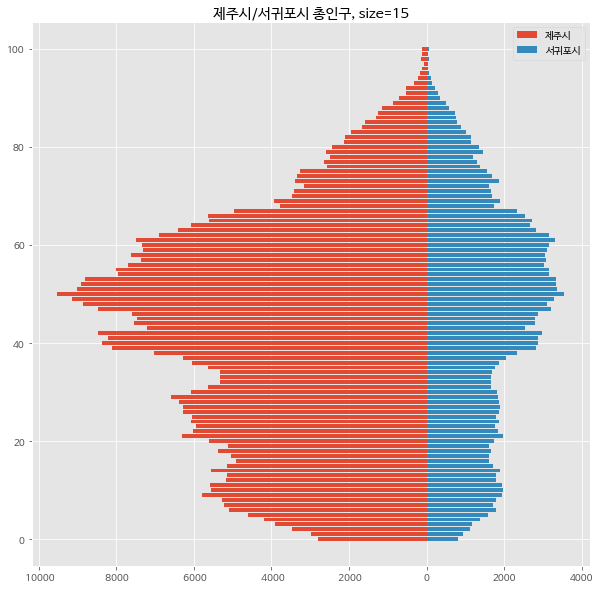

In [17]:
# 제주시/서귀포시 총인구를 이용한 비교차트 생성(차트종료: 아무거나)
val = []

#for i in jjtot_df.iloc[0]:
#    val.append(-i)

#    plt.figure(figsize=(10, 10))
#    plt.barh(jjtot_df.columns, val, label="제주시")
#    plt.barh(sgtot_df.columns, sgtot_df.iloc[0], label="서귀포시")

#    plt.legend()

#plt.show()

jjtot_df.columns=range(len(jjtot_df.columns))
sgtot_df.columns=range(len(sgtot_df.columns))

plt.figure(figsize=(10, 10))

plt.barh(jjtot_df.columns, jjtot_df.apply(lambda x: -x).iloc[0], label="제주시")
plt.barh(sgtot_df.columns, sgtot_df.iloc[0], label="서귀포시")
plt.title("제주시/서귀포시 총인구, size=15")
plt.legend()
plt.show()


########### 질문) for문을 여러가지 생각하면서 하다가 안되서 학습했던 내용으로 진행 했음에도 오류가 발생합니다. 이유를 알고싶습니다. 또한, 옳바른 for문을 알려주셨으면 합니다!

In [ ]:
# 제주시와 서귀포시 남/여 현환 분석 및 차트 표현
#jtot_df1
jmale_df = jtot_df1.iloc[:, 106:207]
#display(jmale_df)
jfemale_df = jtot_df1.iloc[:, 209:310]
#display(jfemale_df)


stot_df1
smale_df = stot_df1.iloc[:, 106:207]
#display(smale_df)
sfemale_df = stot_df1.iloc[:, 209:310]
#display(sfemale_df)


jmale_df.columns=range(len(jmale_df.columns))
jfemale_df.columns=range(len(jfemale_df.columns))

plt.figure(figsize=(10, 10))

plt.barh(jmale_df.columns, jmale_df.iloc[0], label="제주시 남자")
plt.barh(jfemale_df.columns, jmale_df.apply(lambda x: -x).iloc[0], label="제주시 여자")
plt.title("제주시 남/여 인구, size=15")
plt.legend()
plt.show()

smale_df.columns=range(len(smale_df.columns))
sfemale_df.columns=range(len(sfemale_df.columns))

plt.figure(figsize=(10, 10))

plt.barh(smale_df.columns, smale_df.iloc[0], label="서귀포시 남자")
plt.barh(sfemale_df.columns, smale_df.apply(lambda x: -x).iloc[0], label="서귀포시 여자")
plt.title("서귀포시 남/여 인구, size=15")
plt.legend()
plt.show()

### 2. 제주시의 지역별/세대별 인구현황을 분석하시오.
- 0 ~ 9, 10 ~ 19, 20 ~ 29, 30 ~ 39, ..., 80 ~ 89, 90 ~ 99, 100이상
- columns => 유아, 10대, 20대, ~~~, 100세이상
- 남여 인구현황 분석(지역별/세대별 등)

In [ ]:
# 전체/남/여 데이터에서 그룹별 단위 묶어주시
# 그룹: 0 ~ 9 => 유아, 10 ~ 19 =>10대, 20 ~ 29=>20대,.., 90 ~ 99=>90대, 100이상

import pandas as pd

gtot_df = pd.read_csv("202202_age.csv", encoding="cp949", header=3,  thousands=",")
gtot_df1 = gtot_df[gtot_df["행정기관"].str.contains("제주시")]
gtot_df1 = gtot_df1.set_index("행정기관")
gtot_df1 = gtot_df1.iloc[:, 3:104]
#gtot_df1

gtot10_df = gtot_df1.iloc[:, 0:10]]
gtot20_df = gtot_df1.iloc[:, 10:20]
gtot30_df = gtot_df1.iloc[:, 20:30]
gtot40_df = gtot_df1.iloc[:, 30:40]
gtot50_df = gtot_df1.iloc[:, 40:50]
gtot60_df = gtot_df1.iloc[:, 50:60]
gtot70_df = gtot_df1.iloc[:, 60:70]
gtot80_df = gtot_df1.iloc[:, 70:80]
gtot90_df = gtot_df1.iloc[:, 80:90]
gtot100_df = gtot_df1.iloc[:, 90:100]

val1 = []; val2 = []; val3 = []; val4 = []; val5 = []; val6 = []; val7 = []
val8 = []; val9 = []; val10 = []

for i in range(len(gtot_df1)):
    if i == 0:
      val1.append(gtot_df1.iloc[:, i:10])
      val2.append(gtot_df1.iloc[:, i+10:20])
      val3.append(gtot_df1.iloc[:, i+20:30])
      val4.append(gtot_df1.iloc[:, i+30:40])
      val5.append(gtot_df1.iloc[:, i+40:50])
      val6.append(gtot_df1.iloc[:, i+50:60])
      val7.append(gtot_df1.iloc[:, i+60:70])
      val8.append(gtot_df1.iloc[:, i+70:80])
      val9.append(gtot_df1.iloc[:, i+80:90])
      val10.append(gtot_df1.iloc[:, i+90:100])

print(val10)
print(val20)

In [ ]:
# 그룹 데이터를 이용한 지역별/성별 분석
